<a href="https://colab.research.google.com/github/Droslj/scATAC-seq-complete-/blob/Google-colab/scATAC_seq_(1)_scvi_Label_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Label transfer for cells and clusters

For label transfer, the query dataset is the dataset you want to annotate.
Among the three functions you mentioned:

1. snapatac2.pp.add_tile_matrix: Generates a cell-by-bin count matrix.
2. snapatac2.pp.make_peak_matrix: Generates a cell-by-peak count matrix.
3. snapatac2.pp.make_gene_matrix: Generates a cell-by-gene activity matrix.

Any of these matrices can serve as the input for your query dataset, depending on the type of analysis you are performing. Typically, the cell-by-peak count matrix (generated by snapatac2.pp.make_peak_matrix) is commonly used for downstream analysis, including label transfer, because it focuses on regions of high accessibility which are often more informative for cell type annotation.

Generate the Cell-by-Peak Count Matrix:
(1) Import fragments file
(2) Create h5ad object using peak file (generated by MAC2 call peaks in Galaxy)
(3) This .h5ad file can then be used as input for various downstream analyses, including label transfer.

The process of setting up and training two models for label transfer using scvi-tools involves distinct steps for different purposes:

1. SCVI Model
Purpose: The SCVI model is trained to learn a latent representation of the data. This step helps in capturing the underlying structure and variability in the single-cell data.

Functionality: By training the SCVI model, you obtain a latent space that can be used for various downstream analyses, including clustering, visualization, and integration of datasets.

2. SCANVI Model
Purpose: The SCANVI model extends the SCVI model by incorporating cell type labels. It is specifically designed for semi-supervised learning, where some cells have known labels (from the reference dataset) and others do not (from the query dataset).

Functionality: The SCANVI model uses the latent representation learned by the SCVI model and refines it by leveraging the cell type labels. This allows for accurate label transfer from the reference dataset to the query dataset.

In summary, the SCVI model is first trained to learn a robust latent representation of the data. The SCANVI model then builds on this representation to perform label transfer, effectively combining the strengths of unsupervised and semi-supervised learning
https://discourse.scverse.org/t/label-transfer-discrepancy-in-scanvi-model-training/2011
https://discourse.scverse.org/t/scanvi-inferred-cell-types-dont-make-sense/3300.

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab

In [ ]:
condacolab.install()

In [ ]:
!conda --version

In [ ]:
!which conda

In [ ]:
!conda config --add channels conda-forge

In [ ]:
!conda config --add channels bioconda

In [ ]:
!pip install snapatac2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account al

In [ ]:
!pip show snapatac2

Name: snapatac2
Version: 2.8.0
Summary: SnapATAC2: Single-cell epigenomics analysis pipeline
Home-page: https://github.com/
Author: Kai Zhang <kai@kzhang.org>
Author-email: Kai Zhang <zhangkai33@westlake.edu.cn>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, igraph, kaleido, macs3, multiprocess, natsort, numpy, pandas, plotly, polars, pooch, pyarrow, pyfaidx, rustworkx, scikit-learn, scipy, tqdm, typeguard
Required-by: 


In [ ]:
import snapatac2 as snap

In [ ]:
!pip install scanpy -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install pybedtools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 106.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 96.2 MB/s eta 0:00:00
  Created wheel for pybedtools: filename=pybedtools-0.11.0-cp311-cp311-linux_x86_64.whl size=14028680 sha256=dd41b2a1bd30fd59aed9ef15c4d58a134068757e2d2af6f33828214319ece1d7
  Stored in directory: /root/.cache/pip/wheels/29/a9/64/b72ced6183351e9fb889c0fc86eda39fab286a4b8838443314
Successfully built pybedtools


In [75]:
pip install leidenalg -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install scvi-tools -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 42.0 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=1987

In [ ]:
!pip install scvi-tools -q

In [ ]:
import scvi

In [ ]:
import pybedtools

In [ ]:
import scanpy as sc

In [ ]:
pip show scanpy

Name: scanpy
Version: 1.10.4
Summary: Single-Cell Analysis in Python.
Home-page: https://scanpy.org
Author: Alex Wolf, Philipp Angerer, Fidel Ramirez, Isaac Virshup, Sergei Rybakov, Gokcen Eraslan, Tom White, Malte Luecken, Davide Cittaro, Tobias Callies, Marius Lange, Andrés R. Muñoz-Rojas
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, h5py, joblib, legacy-api-wrap, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, patsy, pynndescent, scikit-learn, scipy, seaborn, session-info, statsmodels, tqdm, umap-learn
Required-by: 


In [ ]:
import numpy as np

In [ ]:
import anndata as ad

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from tqdm import tqdm

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Import reads from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import fragments file
#data = snap.pp.import_fragments('/content/drive/MyDrive/Colab Notebooks/SortBed Sinto_fragments.bed', chrom_sizes=snap.genome.hg38, sorted_by_barcode=False)

# Wrap import_fragments with tqdm to show progress
with tqdm(total=1, desc="Importing fragments") as pbar:
    data = snap.pp.import_fragments(
        '/content/drive/MyDrive/Colab Notebooks/SortBed Sinto_fragments.bed',
        chrom_sizes=snap.genome.hg38,
        sorted_by_barcode=False,
    )
    pbar.update(1) # Update progress bar after completion

In [ ]:
# Create cell by peak matrix
peak_mat = snap.pp.make_peak_matrix(data, peak_file='/content/drive/MyDrive/Colab Notebooks/MACS2_callpeak_narrow_Peaks.bed')
print(peak_mat)

AnnData object with n_obs × n_vars = 10210 × 200379
    obs: 'n_fragment', 'frac_dup', 'frac_mito'


In [ ]:
# Save the AnnData object to an .h5ad file
peak_mat.write("/content/drive/MyDrive/Colab Notebooks/peak_matrix.h5ad")

In [ ]:
# Load your single-cell ATAC-seq data
adata = snap.read_h5ad("/content/drive/MyDrive/Colab Notebooks/peak_matrix.h5ad")

# Preprocess the Query Dataset



In [59]:
adata = peak_mat

In [60]:
# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [61]:
# Identify highly variable peaks
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [62]:
adata

AnnData object with n_obs × n_vars = 10210 × 2000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

# Load and Preprocess the Reference Dataset
Load your reference dataset, which contains annotated cell types, and preprocess it similarly.



In [ ]:
reference = sc.read("/content/drive/MyDrive/Colab Notebooks/PBMC_reference_atlas_final.h5ad")

In [ ]:
reference

AnnData object with n_obs × n_vars = 39441 × 196618
    obs: 'celltypes', 'tissue', 'dataset'

In [ ]:
# Normalize the reference data
sc.pp.normalize_total(reference, target_sum=1e4)
sc.pp.log1p(reference)

In [ ]:
# Identify highly variable genes in the reference dataset
sc.pp.highly_variable_genes(reference, n_top_genes=2000, subset=True)

In [ ]:
reference

AnnData object with n_obs × n_vars = 39441 × 2000
    obs: 'celltypes', 'tissue', 'dataset'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

# Find Anchors and Transfer Labels:
Use scvi-tools to find anchors between the reference and query datasets and transfer the labels.



In [ ]:
# Set up scVI model for the reference dataset
scvi.model.SCVI.setup_anndata(reference)
vae = scvi.model.SCVI(reference)
vae.train()

/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training:   0%|          | 0/203 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.11/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.11/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
INFO: `Trainer.fit` stopped: `max_epochs=203` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=203` reached.


In [54]:
vae.save("/content/MyDrive/Colab Notebooks/refset_trained_vae_model", overwrite=True)

In [ ]:
reference

AnnData object with n_obs × n_vars = 39441 × 2000
    obs: 'celltypes', 'tissue', 'dataset', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [ ]:
# Set up scANVI model for label transfer
scvi.model.SCANVI.setup_anndata(reference, labels_key="celltypes", unlabeled_category="Unknown")
scanvi = scvi.model.SCANVI(reference)
scanvi.train()

INFO     Training for 203 epochs.                                                                                  


/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training:   0%|          | 0/203 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/scvi/module/_scanvae.py:305: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/usr/local/lib/python3.11/dist-packages/scvi/module/_scanvae.py:305: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/usr/local/lib/python3.11/dist-packages/scvi/module/_scanvae.py:305: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
INFO: `Trainer.fit` stopped: `max_epochs=203` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=203` reached.


In [53]:
scanvi.save("/content/MyDrive/Colab Notebooks/refset_trained_scvi_model", overwrite=True)

In [64]:
# Transfer labels to the query dataset
scvi.model.SCVI.setup_anndata(adata)
adata.obs["celltypes"] = "Unknown" # Create a dummy 'celltypes' column in adata.obs

query_labels = scanvi.predict(adata)
adata.obs["predicted_labels"] = query_labels

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [68]:
adata

AnnData object with n_obs × n_vars = 10210 × 2000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', '_scvi_batch', '_scvi_labels', 'celltypes', 'predicted_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

# Evaluate and Visualize
(1) Evaluate the transferred labels and
(2) visualize the results to ensure accurate annotation.



In [81]:
sc.pp.neighbors(adata)

In [72]:
adata

AnnData object with n_obs × n_vars = 10210 × 2000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', '_scvi_batch', '_scvi_labels', 'celltypes', 'predicted_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'pca', 'neighbors', 'umap', 'predicted_labels_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [76]:
sc.tl.leiden(adata)  # This adds a 'leiden' column to adata.obs with cluster assignments

<ipython-input-76-afa1bb47aba8>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)  # This adds a 'leiden' column to adata.obs with cluster assignments


In [77]:
sc.tl.umap(adata)

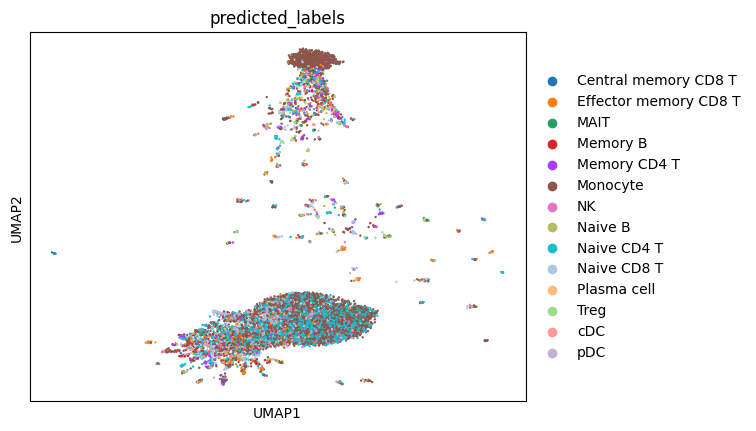

In [80]:
sc.pl.umap(adata, color=["predicted_labels"])

In [82]:
adata

AnnData object with n_obs × n_vars = 10210 × 2000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', '_scvi_batch', '_scvi_labels', 'celltypes', 'predicted_labels', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'pca', 'neighbors', 'umap', 'predicted_labels_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [87]:
adata.X.shape

(10210, 2000)